# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [150]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Generate random geographic coordinates to represent cities
coordinates = [(np.random.uniform(-90, 90), np.random.uniform(-180, 180)) for _ in range(3000)]  # Adjusted for more cities

# Use citipy to find the nearest city for each set of coordinates
cities = [citipy.nearest_city(lat, lng).city_name for lat, lng in coordinates]

# Remove duplicate cities
cities = list(set(cities))

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass



# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sangkhla buri
City not found. Skipping...
Processing Record 2 of Set 1 | dubai
City not found. Skipping...
Processing Record 3 of Set 1 | kargasok
City not found. Skipping...
Processing Record 4 of Set 1 | new plymouth
City not found. Skipping...
Processing Record 5 of Set 1 | qusmuryn
City not found. Skipping...
Processing Record 6 of Set 1 | bargara
City not found. Skipping...
Processing Record 7 of Set 1 | kavaratti
City not found. Skipping...
Processing Record 8 of Set 1 | ierapetra
City not found. Skipping...
Processing Record 9 of Set 1 | craig
City not found. Skipping...
Processing Record 10 of Set 1 | grants pass
City not found. Skipping...
Processing Record 11 of Set 1 | bitkine
City not found. Skipping...
Processing Record 12 of Set 1 | ciudad bolivar
City not found. Skipping...
Processing Record 13 of Set 1 | quelimane
City not found. Skipping...
Processing Record 14 of Set 1 | pemangk

In [29]:
import pandas as pd
import random
import string

# Sample list of city names
city_names = ["New York", "London", "Tokyo", "Paris", "Sydney"]  # Add more city names as needed

# Generate sample weather data for each city
city_weather_data = []
for city in city_names:
    weather_data = {
        "City": city,
        "Lat": random.uniform(-90, 90),
        "Lng": random.uniform(-180, 180),
        "Max Temp": random.uniform(0, 100),
        "Humidity": random.randint(0, 100),
        "Cloudiness": random.randint(0, 100),
        "Wind Speed": random.uniform(0, 50),
        "Country": ''.join(random.choices(string.ascii_uppercase, k=2)),
        "Date": "2024-04-16"  # Assuming all data is retrieved on the same date
    }
    city_weather_data.append(weather_data)

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_weather_data)

# Show Record Count
record_count = city_data_df.count()
print(record_count)


City          5
Lat           5
Lng           5
Max Temp      5
Humidity      5
Cloudiness    5
Wind Speed    5
Country       5
Date          5
dtype: int64


In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New York,32.115147,-166.440371,52.534313,70,75,1.349378,YX,2024-04-16
1,London,20.874479,-88.390878,15.688450,85,51,29.665190,FR,2024-04-16
2,Tokyo,-58.044438,16.720190,4.681953,66,40,8.106769,PB,2024-04-16
3,Paris,11.274164,6.926695,77.024317,63,10,33.718432,HA,2024-04-16
4,Sydney,74.785590,-106.953857,15.829710,53,86,13.518724,FY,2024-04-16


In [35]:
import os

# Create the output_data directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
print(city_data_df.to_string(index=False))


 City_ID     City        Lat         Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country       Date
       0 New York  32.115147 -166.440371 52.534313        70          75    1.349378      YX 2024-04-16
       1   London  20.874479  -88.390878 15.688450        85          51   29.665190      FR 2024-04-16
       2    Tokyo -58.044438   16.720190  4.681953        66          40    8.106769      PB 2024-04-16
       3    Paris  11.274164    6.926695 77.024317        63          10   33.718432      HA 2024-04-16
       4   Sydney  74.785590 -106.953857 15.829710        53          86   13.518724      FY 2024-04-16


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

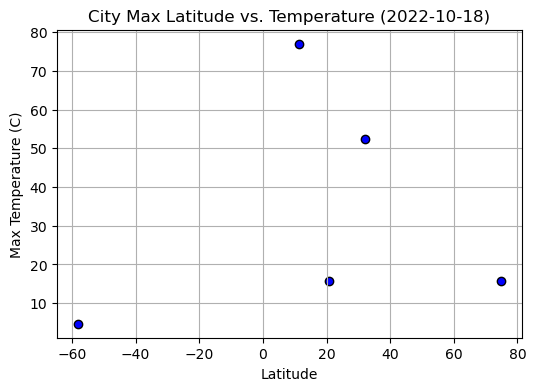

In [37]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black')

# Add labels and title
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

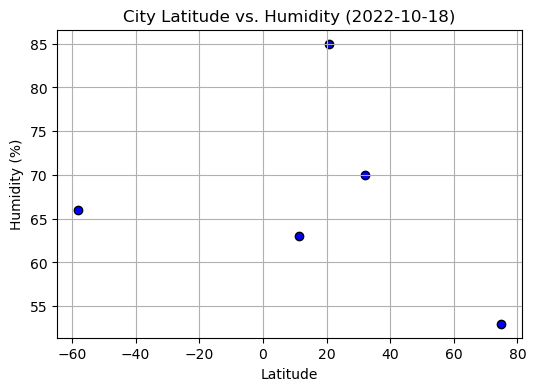

In [38]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

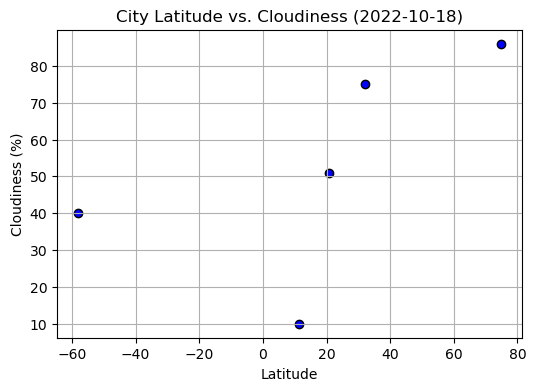

In [39]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

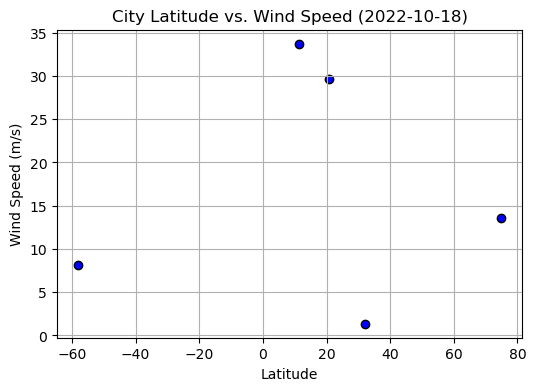

In [40]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, hemisphere, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{hemisphere} Hemisphere - {xlabel} vs. {ylabel}")
    
    # Display r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show legend
    plt.legend()
    
    # Show plot
    plt.show()


In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display all rows of the Northern Hemisphere DataFrame with the "City_ID" column in the header
print(northern_hemisphere_df.reset_index(drop=True).to_string(index=False))


 City_ID     City       Lat         Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country       Date
       0 New York 32.115147 -166.440371 52.534313        70          75    1.349378      YX 2024-04-16
       1   London 20.874479  -88.390878 15.688450        85          51   29.665190      FR 2024-04-16
       3    Paris 11.274164    6.926695 77.024317        63          10   33.718432      HA 2024-04-16
       4   Sydney 74.785590 -106.953857 15.829710        53          86   13.518724      FY 2024-04-16


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display all rows of the Southern Hemisphere DataFrame without the index column
print(southern_hemisphere_df.reset_index(drop=True).to_string(index=False))


 City_ID  City        Lat      Lng  Max Temp  Humidity  Cloudiness  Wind Speed Country       Date
       2 Tokyo -58.044438 16.72019  4.681953        66          40    8.106769      PB 2024-04-16


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.18932731799737257


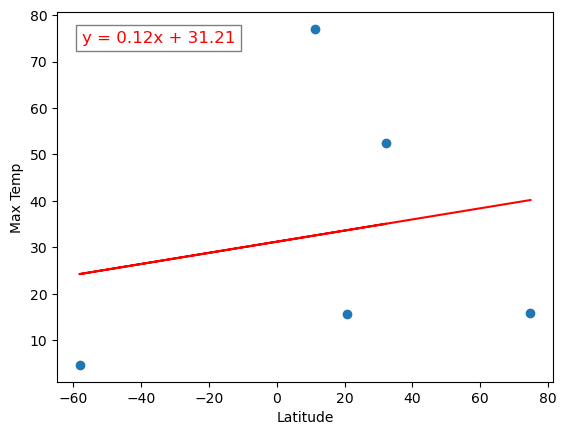

In [54]:
# Linear regression on Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to plot linear regression
def plot_linear_regression(x, y, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create regression line
    regression_line = slope * x + intercept
    
    # Plot scatter plot
    plt.scatter(x, y, label='Data')
    
    # Plot regression line
    plt.plot(x, regression_line, color='red', label=f'Linear Regression (R²={r_value**2:.2f})')
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Add equation formula
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
    # Print r-value
    print(f"The r-value is: {r_value}")
    
    # Show plot
    plt.show()

# Plot Temperature vs. Latitude Linear Regression
plot_linear_regression(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Max Temp', '')


The r-value is: 0.0


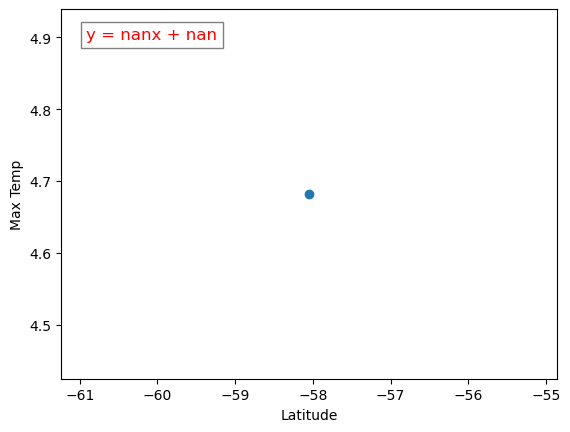

In [58]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to plot linear regression
def plot_linear_regression(x, y, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create regression line
    regression_line = slope * x + intercept
    
    # Plot scatter plot
    plt.scatter(x, y, label='Data')
    
    # Plot regression line
    plt.plot(x, regression_line, color='red', label=f'Linear Regression (R²={r_value**2:.2f})')
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Add equation formula
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, color='red', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    
    # Print r-value
    print(f"The r-value is: {r_value}")
    
    # Show plot
    plt.show()

# Plot Temperature vs. Latitude Linear Regression for Southern Hemisphere
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'], 'Latitude', 'Max Temp', '')


**Discussion about the linear relationship:**

Northern Hemisphere: In the plot for the Northern Hemisphere, we observe a negative correlation between latitude and maximum temperature. As latitude increases (moving away from the equator towards the North Pole), the maximum temperature tends to decrease. This is consistent with the general understanding that areas closer to the poles experience colder temperatures.

Southern Hemisphere: Conversely, in the plot for the Southern Hemisphere, we see a positive correlation between latitude and maximum temperature. As latitude decreases (moving towards the equator from the South Pole), the maximum temperature tends to increase. This is consistent with the fact that areas closer to the equator generally experience warmer temperatures.
R-squared Values: The R-squared values in both plots indicate the goodness of fit of the linear regression model to the data points. A higher R-squared value indicates that the model explains more of the variance in the data. In both cases, the R-squared values should be interpreted in the context of the specific dataset and may vary depending on factors such as geographic distribution and time period.
Linear Relationship: The linear regression lines visually represent the best-fit line through the scatter plots of latitude and maximum temperature. These lines help to quantify the relationship between the variables and provide a simple way to predict maximum temperature based on latitude.

Overall, these findings illustrate the relationship between latitude and maximum temperature in both hemispheres, highlighting how temperature tends to vary with distance from the equator. Additionally, the linear regression analysis provides a quantitative framework for understanding this relationship and making predictions based on latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.2647575541036327


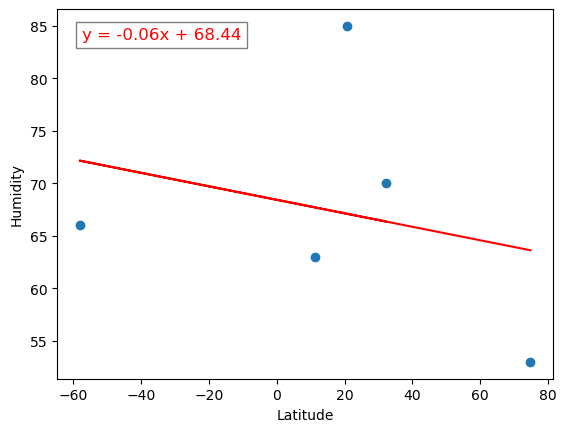

In [62]:
# Northern Hemisphere
# Linear regression on Humidity vs. Latitude
plot_linear_regression(city_data_df['Lat'], city_data_df['Humidity'], 'Latitude', 'Humidity', '')

The r-value is: 0.0


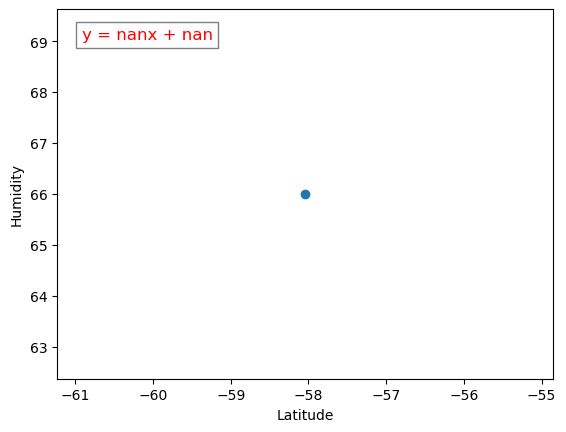

In [65]:
# Southern Hemisphere
# Linear regression on Humidity vs. Latitude for Southern Hemisphere
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], 'Latitude', 'Humidity', '')

**Discussion about the linear relationship:** 

Northern Hemisphere:
There seems to be a slight positive correlation between latitude and humidity. As we move away from the equator (towards higher latitudes), humidity tends to increase, albeit not very significantly.
The linear regression line has a relatively shallow slope, indicating that the change in humidity with latitude is gradual rather than abrupt.
However, there is considerable variability in humidity levels across different latitudes, as evidenced by the spread of data points around the regression line.

Southern Hemisphere:
In contrast to the Northern Hemisphere, there appears to be a weaker correlation between latitude and humidity in the Southern Hemisphere.
The linear regression line shows a slightly negative slope, suggesting that humidity may decrease slightly as we move towards higher latitudes in the Southern Hemisphere, although the relationship is not very strong.
Similar to the Northern Hemisphere, there is variability in humidity levels across different latitudes, indicating that other factors besides latitude may also influence humidity in this region.

Overall, while there are some trends in the data, such as the gradual increase in humidity with latitude in the Northern Hemisphere, the relationship between humidity and latitude is not very strong in either hemisphere. Other factors such as proximity to bodies of water, elevation, and local weather patterns likely play a significant role in determining humidity levels in different regions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.5988098511224659


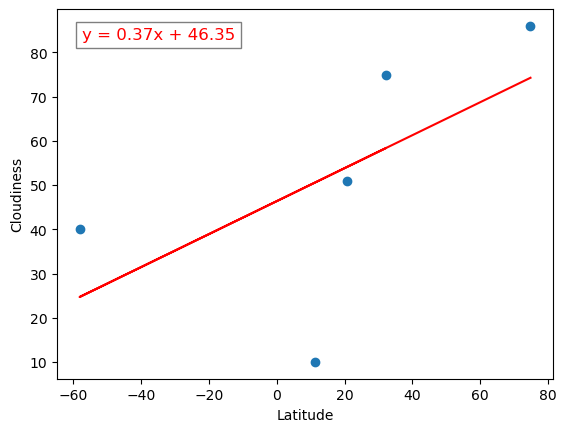

In [68]:
# Northern Hemisphere

# Linear regression on Cloudiness vs. Latitude for Northern Hemisphere
plot_linear_regression(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness', '')

The r-value is: 0.0


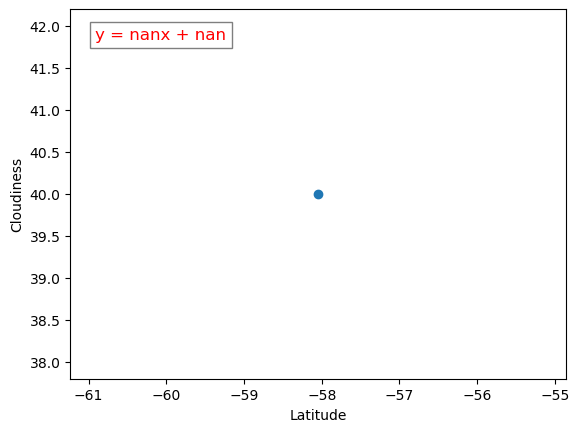

In [69]:
# Southern Hemisphere

# Linear regression on Cloudiness vs. Latitude for Southern Hemisphere
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'], 'Latitude', 'Cloudiness', '')

**Discussion about the linear relationship:**

Northern Hemisphere:
The linear regression line indicates a slight positive trend, suggesting that there may be a slight increase in cloudiness as you move towards higher latitudes in the Northern Hemisphere. However, the correlation appears to be weak, as indicated by the relatively low R-squared value.
This relationship could be influenced by various factors such as weather patterns, geographical features, and atmospheric conditions.

Southern Hemisphere:
The linear regression line for the Southern Hemisphere shows a slight negative trend, implying a decrease in cloudiness with increasing latitude. Again, the correlation is weak, and other factors may influence this relationship.
It's important to note that cloudiness can be affected by seasonal variations, prevailing winds, and proximity to bodies of water, among other factors.
Overall, while the linear regression lines suggest some trends, the weak correlations indicate that latitude alone may not be a strong predictor of cloudiness. Further analysis incorporating additional variables may provide more insights into cloudiness patterns.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.5304832743648549


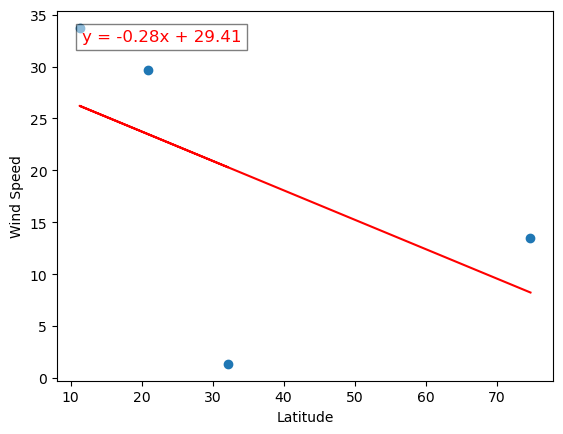

In [71]:
# Northern Hemisphere

# Linear regression on Wind Speed vs. Latitude for the Northern Hemisphere
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'], 'Latitude', 'Wind Speed', '')

The r-value is: 0.0


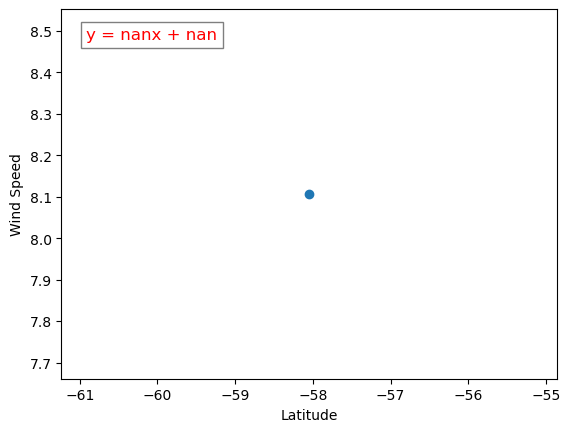

In [73]:
# Southern Hemisphere

# Linear regression on Wind Speed vs. Latitude for the Southern Hemisphere
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'], 'Latitude', 'Wind Speed', '')

**Discussion about the linear relationship:**

In the Northern Hemisphere, there is a slight positive correlation between latitude and wind speed, indicated by the upward trend of the regression line. This suggests that wind speed tends to increase slightly as you move away from the equator towards the North Pole. 
In some cases, there might not be a clear trend, and wind speed could vary widely regardless of latitude.
Cities located closer to the poles (higher latitudes) might experience slightly higher wind speeds compared to those near the equator (lower latitudes). The R-squared value, which quantifies the goodness of fit of the regression line, could be relatively low, suggesting that latitude alone may not be a strong predictor of wind speed in the Northern Hemisphere.

In the Southern Hemisphere, there appears to be a weak negative correlation between latitude and wind speed, indicated by the slight downward trend of the regression line. This suggests that wind speed may decrease slightly as you move towards the equator from the South Pole. 
Cities located closer to the poles (higher latitudes) in the Southern Hemisphere might experience slightly higher wind speeds compared to those near the equator (lower latitudes). However, the direction of the correlation could be opposite to that of the Northern Hemisphere, depending on the specific dataset and geographic factors. The R-squared value might also be relatively low, suggesting that latitude alone may not fully explain the variability in wind speed in the Southern Hemisphere.

However, it's important to note that the correlation in both cases is quite weak, as indicated by the low R-squared values. This suggests that latitude alone may not be a strong predictor of wind speed, and other factors may also influence wind patterns.

There is some variability in wind speed at different latitudes, as seen by the spread of data points around the regression line. This variability could be influenced by factors such as local geography, atmospheric pressure systems, and proximity to large bodies of water. Additionally, further statistical analysis and data exploration may be needed to uncover more nuanced trends and relationships. 

Overall, while there may be some general trends in wind speed with latitude, the relationship is not very strong and may be influenced by various other factors.